In [1]:
import sys, IPython, scipy, matplotlib
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
import requests
import warnings

In [2]:
%config InlineBackend.figure_format = 'retina'
warnings.simplefilter(action='ignore', category=(FutureWarning, UserWarning))

In [3]:
print("""This notebook was created using:
Python {}
IPython {}
NumPy {}
SciPy {}
Pandas {}
Matplotlib {}\n""".format(sys.version[:5], 
                             IPython.__version__, 
                             np.__version__, 
                             scipy.__version__, 
                             pd.__version__, 
                             matplotlib.__version__))

This notebook was created using:
Python 3.7.4
IPython 7.13.0
NumPy 1.18.2
SciPy 1.4.1
Pandas 1.0.3
Matplotlib 3.2.1



In [4]:
# load data
df_house = pd.read_csv('County_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_mon.csv', ',')
df_house.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,StateCodeFIPS,MunicipalCodeFIPS,1996-01-31,...,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30
0,3101,0,Los Angeles County,County,CA,CA,Los Angeles-Long Beach-Anaheim,6,37,177369.0,...,652653.0,658083.0,662786.0,664578.0,665819.0,670910.0,678454.0,686976.0,694075.0,700973.0
1,139,1,Cook County,County,IL,IL,Chicago-Naperville-Elgin,17,31,154867.0,...,254157.0,254615.0,255007.0,255521.0,256248.0,257612.0,259372.0,261883.0,264597.0,267014.0
2,1090,2,Harris County,County,TX,TX,Houston-The Woodlands-Sugar Land,48,201,100342.0,...,200343.0,201277.0,202437.0,203421.0,204132.0,205012.0,206065.0,207825.0,209495.0,211558.0
3,2402,3,Maricopa County,County,AZ,AZ,Phoenix-Mesa-Scottsdale,4,13,115582.0,...,295030.0,297584.0,301115.0,304317.0,307285.0,310207.0,314089.0,318733.0,323779.0,329195.0
4,2841,4,San Diego County,County,CA,CA,San Diego-Carlsbad,6,73,181454.0,...,613098.0,617385.0,620584.0,624763.0,627858.0,632088.0,638731.0,648503.0,659532.0,670649.0


In [5]:
# select GA data
df_house_GA = df_house.loc[df_house["State"] == "GA"]
# select data for Year 2020
mask = (df_house_GA.columns.values[9:] > "2019-12-31") & (df_house_GA.columns.values[9:] <= "2020-12-31")
df_selected = df_house_GA.iloc[:,np.concatenate([range(0, 9), np.where(mask)[0]+9])]

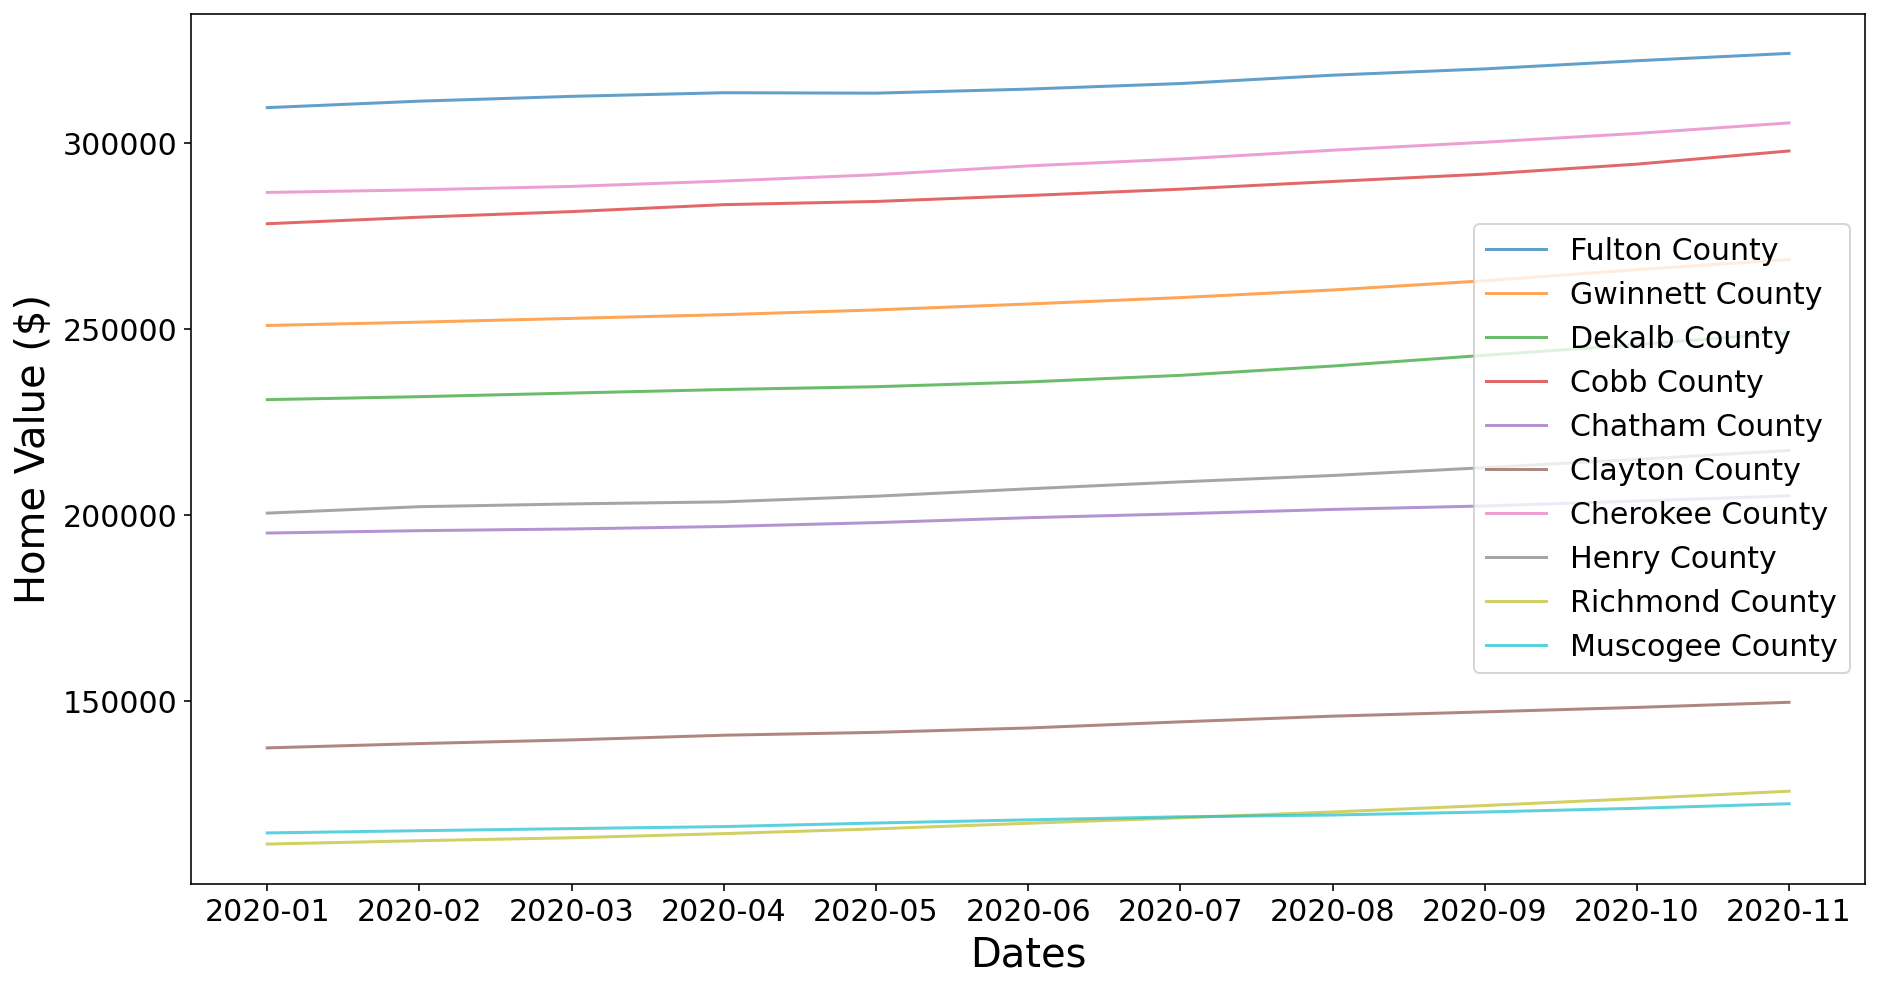

In [6]:
# plot figure
fig = plt.figure(figsize=(15, 8))
for n, col in enumerate(df_selected["RegionName"].values[:10]): 
    plt.plot(df_selected.iloc[n, 9:].values, alpha=0.7, label = col)
plt.ylabel('Home Value ($)', fontsize=20)
plt.xlabel('Dates', fontsize=20)
plt.legend(fontsize=15)
dates = pd.to_datetime(df_selected.columns[9:], format = "%Y/%m/%d").to_series().dt.strftime('%Y-%m').values
at = np.arange(0, 11)
plt.xticks(at, dates)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()